# EDA (Exploratory Data Analysis) for COTM 8 by AISC
### In this notebook we will attempt to Clean the data plot it and complete the COTW

In [2]:
# standard imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
study_hours_data = pd.read_csv('./study_data.csv')
study_hours_data.head()

,Hours,marks
0,0.0,-31.0
1,9.0,-18.0
2,8.0,40.0
3,6.0,21.0
4,2.0,-44.0


In [23]:
study_hours_data.isna().sum()

Hours    14
marks    13
dtype: int64

In [24]:
study_hours_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   186 non-null    float64
 1   marks   187 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [25]:
study_hour_data.describe()

,Hours,marks
count,186.000000,187.000000
mean,5.284946,47.058824
std,5.629026,44.275187
min,-4.000000,-44.000000
25%,2.000000,15.500000
50%,4.000000,40.000000
75%,8.000000,81.500000
max,24.000000,148.000000


# Cleaning the Data

In [27]:
len(study_hours_data[(study_hours_data['Hours'] < 0) | (study_hours_data['Hours'] > 10) | (study_hours_data['Hours'].isna())])

53

In [28]:
len(study_hours_data[(study_hours_data['marks'] < 0) | (study_hours_data['marks'] > 100) | (study_hours_data['marks'].isna())])

57

In [29]:
condition = (
    (study_hours_data['Hours'] < 0) | 
    (study_hours_data['Hours'] > 10) | 
    (study_hours_data['Hours'].isna()) | 
    (study_hours_data['marks'] < 0) | 
    (study_hours_data['marks'] > 100) | 
    (study_hours_data['marks'].isna())
)
len(study_hours_data[condition])

96

## we see that 96 rows does not have a valid input, we need to clean that.

In [30]:
print('Ambigious stats')
print("-ve hours: " + str(sum(study_hours_data['Hours'] < 0)))
print("+ve hours: " + str(sum(study_hours_data['Hours'] > 10)))
print("NaN hours: " + str(sum(study_hours_data['Hours'].isna())))
print("-ve marks: " + str(sum(study_hours_data['marks'] < 0)))
print("+ve marks: " + str(sum(study_hours_data['marks'] > 100)))
print("NaN marks: " + str(sum(study_hours_data['marks'].isna())))

Ambigious stats
-ve hours: 16
+ve hours: 23
NaN hours: 14
-ve marks: 21
+ve marks: 23
NaN marks: 13


In [31]:
study_hours_data.describe()

,Hours,marks
count,186.000000,187.000000
mean,5.284946,47.058824
std,5.629026,44.275187
min,-4.000000,-44.000000
25%,2.000000,15.500000
50%,4.000000,40.000000
75%,8.000000,81.500000
max,24.000000,148.000000


In [34]:
study_hours_data.median()

Hours     4.0
marks    40.0
dtype: float64

### ! Replacing the NaN values

In [50]:
study_hours_data['Hours'].mode()[0]

5.0

In [51]:
# we will replace all the NaN values in the hours column with the mode 
study_hours_data['Hours'].fillna(study_hours_data['Hours'].mode()[0], inplace=True)

In [52]:
study_hours_data.isna().sum()

Hours     0
marks    13
dtype: int64

In [57]:
study_hours_data.describe()

,Hours,marks
count,200.000000,187.000000
mean,5.265000,47.058824
std,5.427899,44.275187
min,-4.000000,-44.000000
25%,2.000000,15.500000
50%,5.000000,40.000000
75%,8.000000,81.500000
max,24.000000,148.000000


In [58]:
# we will replace the nan values in marks with the `75 percentile` of the data
study_hours_data['marks'].fillna(81.5, inplace=True) 

In [60]:
study_hours_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   200 non-null    float64
 1   marks   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [61]:
study_hours_data.describe()

,Hours,marks
count,200.000000,200.00000
mean,5.265000,49.29750
std,5.427899,43.64271
min,-4.000000,-44.00000
25%,2.000000,16.75000
50%,5.000000,47.00000
75%,8.000000,81.50000
max,24.000000,148.00000


## Replacing the ambigious values
1. Replacing the -ve values in Hours column

In [71]:
np.percentile(study_hours_data['Hours'], 20)

1.0

In [73]:
# we will replace the -ve values with the 20 percentile of the data
study_hours_data['Hours'][study_hours_data['Hours'] < 0] = np.percentile(study_hours_data['Hours'], 20)

In [74]:
study_hours_data.describe()

,Hours,marks
count,200.000000,200.00000
mean,5.525000,49.29750
std,5.121575,43.64271
min,0.000000,-44.00000
25%,2.000000,16.75000
50%,5.000000,47.00000
75%,8.000000,81.50000
max,24.000000,148.00000


2. As we cann't study more than 10-11 hrs (average person/student), we will replace the values which are more than 10 with the 75 percentile of the data, which seems ok.

In [75]:
study_hours_data['Hours'][study_hours_data['Hours'] > 10] = np.percentile(study_hours_data['Hours'], 75)

In [76]:
study_hours_data.describe()

,Hours,marks
count,200.000000,200.00000
mean,4.465000,49.29750
std,2.896675,43.64271
min,0.000000,-44.00000
25%,2.000000,16.75000
50%,5.000000,47.00000
75%,8.000000,81.50000
max,9.000000,148.00000


3. Replacing the ambigious values in the marks column with the median of marks

In [83]:
study_hours_data['marks'].median(), study_hours_data['marks'].mean()

(47.0, 49.2975)

In [88]:
study_hours_data['marks'][(study_hours_data['marks'] < 0) | (study_hours_data['marks'] > 100)] = study_hours_data['marks'].median()

In [89]:
study_hours_data.describe()

,Hours,marks
count,200.000000,200.000000
mean,4.465000,47.737500
std,2.896675,25.990283
min,0.000000,0.000000
25%,2.000000,27.750000
50%,5.000000,47.000000
75%,8.000000,66.250000
max,9.000000,99.000000


<AxesSubplot:xlabel='Hours', ylabel='marks'>

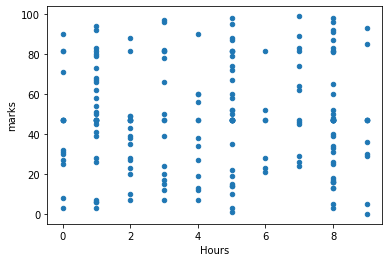

In [95]:
study_hours_data.plot.scatter('Hours', 'marks')

<AxesSubplot:xlabel='Hours'>

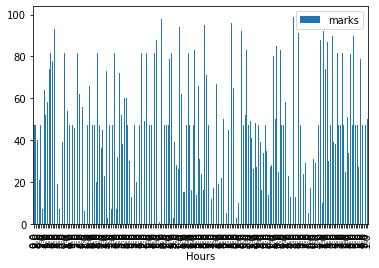

In [93]:
study_hours_data.plot(kind='bar', x='Hours')

<AxesSubplot:xlabel='marks'>

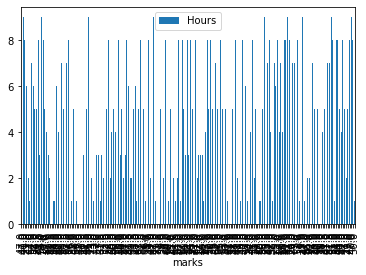

In [94]:
study_hours_data.plot.bar('marks')